In [19]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from PIL import Image
import random
import math
import matplotlib.pyplot as plt

In [2]:
training_data = np.load('./output/training_data.npy')
training_labels = np.load('./output/training_dists.npy')

#pad the training data matrix so it is 100x1024

#(500, 100, 1000, 1)

zero_padding_array = np.zeros((500,100,600,1))

In [3]:
training_data.shape

(500, 100, 1000, 1)

In [4]:
training_labels.shape

(500, 100, 100, 1)

In [5]:
zero_padding_array.shape

(500, 100, 600, 1)

In [6]:
print(training_data.shape)
training_data = np.concatenate([training_data, zero_padding_array], axis=2)
print(training_data.shape)

print(training_labels.shape)

samples_count = training_data.shape[0]

train_size = math.floor(0.85*training_data.shape[0])

shuffle_indices = random.sample(range(0, samples_count), samples_count)

print('train_size: ', train_size)
print('samples_count: ', samples_count)
indices_train = shuffle_indices[0:train_size]
indices_test = shuffle_indices[train_size:samples_count]

X_train = training_data[indices_train,:]
Y_train = training_labels[indices_train]

X_test = training_data[indices_test,:]
Y_test = training_labels[indices_test]

print('X_train.shape : ', X_train.shape)
print('X_test.shape : ', X_test.shape)

print('Y_train.shape : ', Y_train.shape)
print('Y_test.shape : ', Y_test.shape)

np.save('./output/X_test.npy', X_test)
np.save('./output/Y_test.npy', Y_test)

(500, 100, 1000, 1)
(500, 100, 1600, 1)
(500, 100, 100, 1)
train_size:  425
samples_count:  500
X_train.shape :  (425, 100, 1600, 1)
X_test.shape :  (75, 100, 1600, 1)
Y_train.shape :  (425, 100, 100, 1)
Y_test.shape :  (75, 100, 100, 1)


In [7]:
model = Sequential()

# Layer 1
model.add(Conv2D(64, input_shape=(100,1600,1), kernel_size=(2,1), strides=(1,1), padding='same'))
#model.add(Conv2D(48, input_shape=(400,11,1), kernel_size=(2,2), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 2)))

# Layer 2
model.add(Conv2D(32, (2, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 2)))

# Layer 3
model.add(Conv2D(16, (2, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 2)))

# Layer 4
model.add(Conv2D(1, (2, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 2)))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 1600, 64)     192       
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 1600, 64)     256       
_________________________________________________________________
activation_1 (Activation)    (None, 100, 1600, 64)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 800, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 800, 32)      4128      
_________________________________________________________________
batch_normalization_2 (Batch (None, 100, 800, 32)      128       
_________________________________________________________________
activation_2 (Activation)    (None, 100, 800, 32)     

In [9]:
# (4) Compile 
#model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

In [10]:
# (5) Train
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=16, epochs=6, verbose=1)

model.save('./output/CNN_model_03.h5')

Train on 425 samples, validate on 75 samples
Epoch 1/6
425/425 [==============================] - 103s 242ms/step - loss: 0.2755 - accuracy: 0.6499 - val_loss: 0.2395 - val_accuracy: 0.6299
Epoch 2/6
425/425 [==============================] - 101s 239ms/step - loss: 0.2280 - accuracy: 0.6496 - val_loss: 0.2375 - val_accuracy: 0.6299
Epoch 3/6
425/425 [==============================] - 101s 238ms/step - loss: 0.2109 - accuracy: 0.6497 - val_loss: 0.2556 - val_accuracy: 0.6299
Epoch 4/6
425/425 [==============================] - 102s 239ms/step - loss: 0.2078 - accuracy: 0.6498 - val_loss: 0.2718 - val_accuracy: 0.6299
Epoch 5/6
425/425 [==============================] - 101s 238ms/step - loss: 0.2066 - accuracy: 0.6498 - val_loss: 0.2823 - val_accuracy: 0.6299
Epoch 6/6
425/425 [==============================] - 101s 239ms/step - loss: 0.2064 - accuracy: 0.6498 - val_loss: 0.2876 - val_accuracy: 0.6299


In [12]:
training_result = model.evaluate(X_train, Y_train)
testing_result = model.evaluate(X_test, Y_test)

75/75 [==============================] - 5s 70ms/step


In [13]:
print('Training Acc: ', training_result[1])
print('Testing Acc: ', testing_result[1])

Training Acc:  0.6502498984336853
Testing Acc:  0.6298533082008362


## X_train plot

In [15]:
X_train_results = model.predict(X_train)

In [30]:
train_show_index_1 = 0
train_show_index_2 = 0

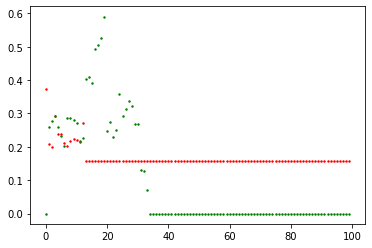

In [36]:
plt.scatter(range(X_train_results[train_show_index_1][train_show_index_2].shape[0]), X_train_results[train_show_index_1][train_show_index_2], c='r', s = 2)
plt.scatter(range(Y_train[train_show_index_1][train_show_index_2].shape[0]), Y_train[train_show_index_1][train_show_index_2], c='g', s = 2)

## X_test plot

In [31]:
X_test_results = model.predict(X_test)

In [33]:
test_show_index_1 = 0
test_show_index_2 = 0

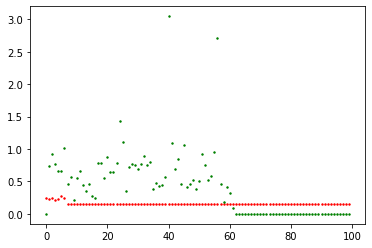

In [38]:
plt.scatter(range(X_test_results[test_show_index_1][test_show_index_2].shape[0]), X_test_results[test_show_index_1][test_show_index_2], c='r', s = 2)
plt.scatter(range(Y_test[test_show_index_1][test_show_index_2].shape[0]), Y_test[test_show_index_1][test_show_index_2], c='g', s = 2)

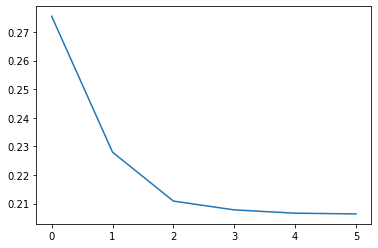

In [39]:
plt.plot(history.history['loss'])
plt.show()